In [2]:
import numpy as np
import pandas as pd
!pip install pyspedas
import pyspedas
from pytplot import get_data
from datetime import datetime

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.2/229.2 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.3 MB/s eta 0:00:00
  Created wheel for hapiclient: filename=hapiclient-0.2.6-py3-none-any.whl size=32862 sha256=2fde50e2492d534e024565274d10b3a47e8fa06f7f528b7b15c0b042d3f77c45
  Stored in directory

In [9]:
# mount drive
from google.colab import drive
drive.mount('/content/gdrive')
images_dir = '/content/gdrive/My Drive/Images'

Mounted at /content/gdrive


In [3]:
mag_vars = pyspedas.stereo.mag(trange=['2008-01-25', '2008-01-31'],probe='b')
plastic_vars = pyspedas.stereo.plastic(trange=['2008-01-25', '2008-01-31'],probe='b')

09-Aug-24 15:24:16: Downloading remote index: http://sprg.ssl.berkeley.edu/data/misc/stereo/impact/level1/behind/mag/RTN/2008/01/
09-Aug-24 15:24:17: Downloading http://sprg.ssl.berkeley.edu/data/misc/stereo/impact/level1/behind/mag/RTN/2008/01/STB_L1_MAG_RTN_20080125_V06.cdf to stereo_data/impact/level1/behind/mag/RTN/2008/01/STB_L1_MAG_RTN_20080125_V06.cdf
09-Aug-24 15:24:17: Download complete: stereo_data/impact/level1/behind/mag/RTN/2008/01/STB_L1_MAG_RTN_20080125_V06.cdf
09-Aug-24 15:24:18: Downloading http://sprg.ssl.berkeley.edu/data/misc/stereo/impact/level1/behind/mag/RTN/2008/01/STB_L1_MAG_RTN_20080126_V06.cdf to stereo_data/impact/level1/behind/mag/RTN/2008/01/STB_L1_MAG_RTN_20080126_V06.cdf
09-Aug-24 15:24:19: Download complete: stereo_data/impact/level1/behind/mag/RTN/2008/01/STB_L1_MAG_RTN_20080126_V06.cdf
09-Aug-24 15:24:19: Downloading http://sprg.ssl.berkeley.edu/data/misc/stereo/impact/level1/behind/mag/RTN/2008/01/STB_L1_MAG_RTN_20080127_V06.cdf to stereo_data/impact

In [4]:
mag_data = get_data('BFIELD')
plastic_proton_number_density = get_data('proton_number_density')
plastic_proton_bulk_speed = get_data('proton_bulk_speed')
plastic_proton_temperature = get_data('proton_temperature')
plastic_proton_thermal_speed = get_data('proton_thermal_speed')

t_mag_data = mag_data.times
t_proton_number_density = plastic_proton_number_density.times
t_proton_bulk_speed = plastic_proton_bulk_speed.times
t_proton_temperature = plastic_proton_temperature.times
t_proton_thermal_speed = plastic_proton_thermal_speed.times

values_mag_data_Br = mag_data.y[:,0]
values_mag_data_Bt = mag_data.y[:,1]
values_mag_data_Bn = mag_data.y[:,2]
values_mag_data_BTot = mag_data.y[:,3]
values_proton_number_density = plastic_proton_number_density.y
values_proton_bulk_speed = plastic_proton_bulk_speed.y
values_proton_temperature = plastic_proton_temperature.y
values_proton_thermal_speed = plastic_proton_thermal_speed.y

In [5]:
dataset_plastic = pd.DataFrame(data=np.column_stack((t_proton_number_density,values_proton_number_density,values_proton_bulk_speed,values_proton_temperature,values_proton_thermal_speed)),columns=['Timestamps','Proton Number Density','Proton Bulk Speed','Proton Temperature','Proton Thermal Speed'])

In [6]:
# unit='s' to convert it into epoch time
dataset_plastic['Datetime'] = pd.to_datetime(dataset_plastic['Timestamps'],
                                  unit='s').dt.strftime('%Y-%m-%d %H:%M')
dataset_plastic["Datetime"] = dataset_plastic["Datetime"].astype("datetime64[ns]")
dataset_plastic_new = dataset_plastic.set_index(pd.DatetimeIndex(dataset_plastic["Datetime"])).drop(["Datetime", "Timestamps"], axis=1)

#print('-------------------------------------------------------')
#maxCl1 = dataset_plastic_new['Proton Number Density'].min()
#print("Minimum value in column 'Proton Number Density': ")
#print(maxCl1)
#print('-------------------------------------------------------')

dataset_plastic_new[dataset_plastic_new < -999.9] = np.nan

display(dataset_plastic_new)

09-Aug-24 15:31:13: <frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()

09-Aug-24 15:31:13: <frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()

09-Aug-24 15:31:13: <frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()

09-Aug-24 15:31:13: <frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()

09-Aug-24 15:31:13: <frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

09-Aug-24 15:31:13: <frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()

09-Aug-24 15:31:13: <frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to fin

,Proton Number Density,Proton Bulk Speed,Proton Temperature,Proton Thermal Speed
Datetime,,,,
2008-01-25 00:00:00,6.87,392.0,114000.0,43.4
2008-01-25 00:01:00,6.31,384.0,122000.0,45.0
2008-01-25 00:02:00,4.92,391.0,81700.0,36.8
2008-01-25 00:03:00,5.23,395.0,70400.0,34.1
2008-01-25 00:04:00,5.77,397.0,81900.0,36.8
...,...,...,...,...
2008-01-30 23:55:00,2.98,646.0,233000.0,62.0
2008-01-30 23:56:00,2.72,638.0,186000.0,55.4
2008-01-30 23:57:00,2.96,634.0,241000.0,63.2


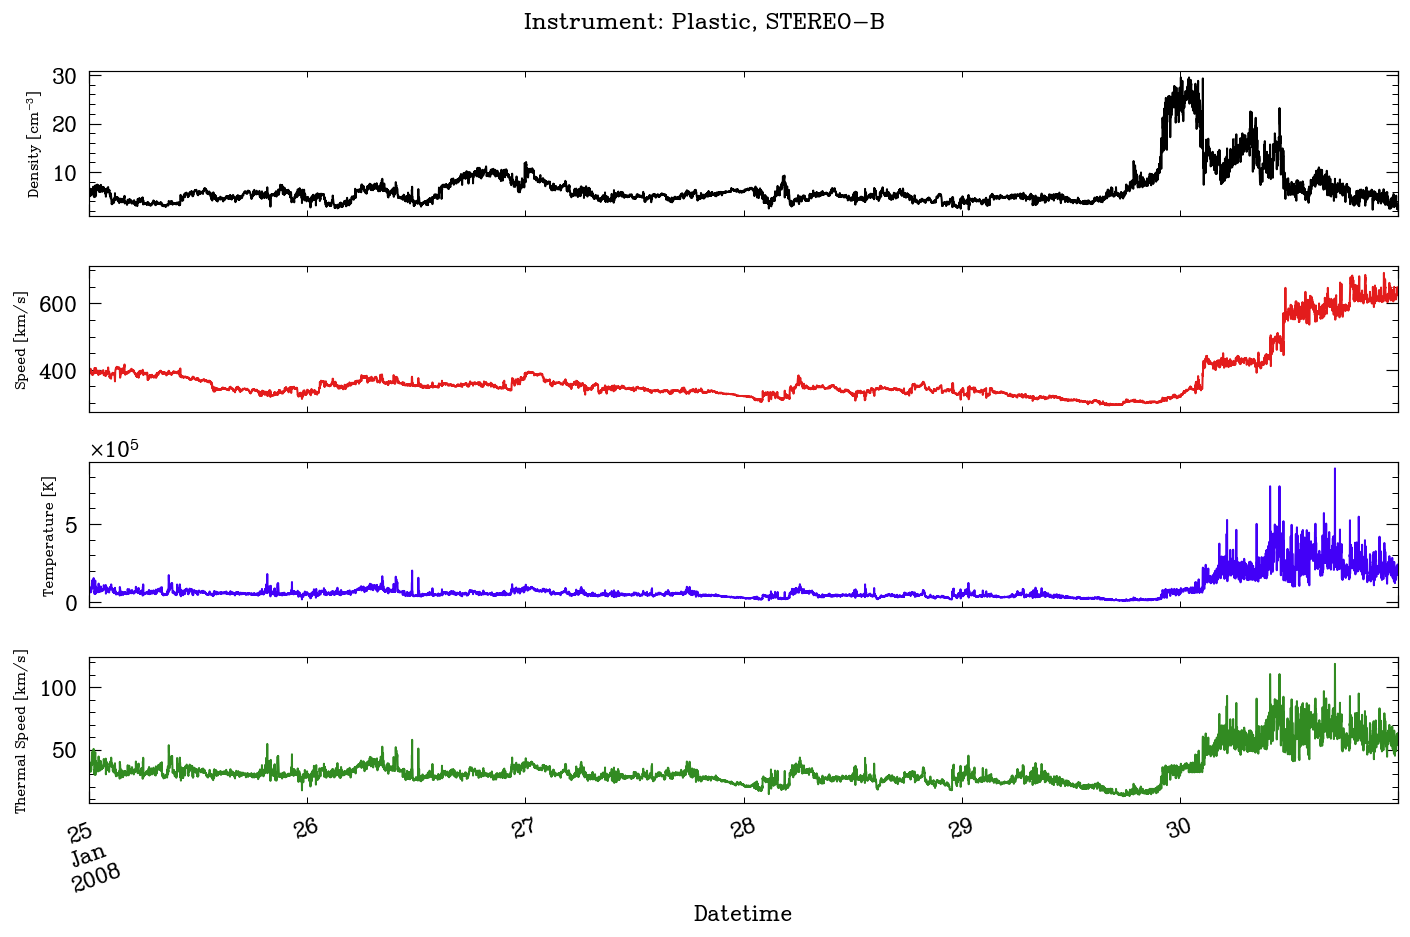

In [10]:
import matplotlib.pyplot as plt
!pip install smplotlib
import smplotlib

fig, a = plt.subplots(4, 1, sharex=True, figsize=(12,8), tight_layout=True)
fig.suptitle('Instrument: Plastic, STEREO-B', fontsize=16)
dataset_plastic_new.plot(ax=a, subplots=True, rot=20, legend=False)
a[0].set_ylabel('Density [cm$^{-3}$]', fontsize = 10)
a[1].set_ylabel('Speed [km$/$s]', fontsize = 10)
a[2].set_ylabel('Temperature [K]', fontsize = 10)
a[3].set_ylabel('Thermal Speed [km$/$s]', fontsize = 10)

plt.savefig(f"{images_dir}/insitu_January2B.png", bbox_inches="tight")
plt.show()

In [ ]:
# Resample to 1 hour resolution

dataset_plastic_resample = dataset_plastic_new.resample('60min').mean()

display(dataset_plastic_resample)

,Proton Number Density,Proton Bulk Speed,Proton Temperature,Proton Thermal Speed
Datetime,,,,
2008-01-25 00:00:00,6.066667,394.133333,87455.000000,37.691667
2008-01-25 01:00:00,6.343833,390.100000,83206.666667,36.965000
2008-01-25 02:00:00,4.935333,387.566667,76961.666667,35.513333
2008-01-25 03:00:00,4.275000,399.716667,58623.333333,31.033333
2008-01-25 04:00:00,3.868833,394.900000,61486.666667,31.826667
...,...,...,...,...
2008-01-30 19:00:00,4.641333,629.733333,259500.000000,65.173333
2008-01-30 20:00:00,5.382333,619.833333,217516.666667,59.380000
2008-01-30 21:00:00,5.060167,616.400000,219100.000000,59.756667


In [11]:
dataset_mag_test = pd.DataFrame(data=np.column_stack((t_mag_data,values_mag_data_Br,values_mag_data_Bt,values_mag_data_Bn,values_mag_data_BTot)),columns=['Timestamps','Bx(R)','By(T)','Bz(N)','Total B'])

# unit='s' to convert it into epoch time
dataset_mag_test['Datetime'] = pd.to_datetime(dataset_mag_test['Timestamps'],
                                  unit='s')
dataset_mag_test["Datetime"] = dataset_mag_test["Datetime"].astype("datetime64[ns]")
dataset_mag_test2 = dataset_mag_test.set_index(pd.DatetimeIndex(dataset_mag_test["Datetime"])).drop(["Datetime", "Timestamps"], axis=1)


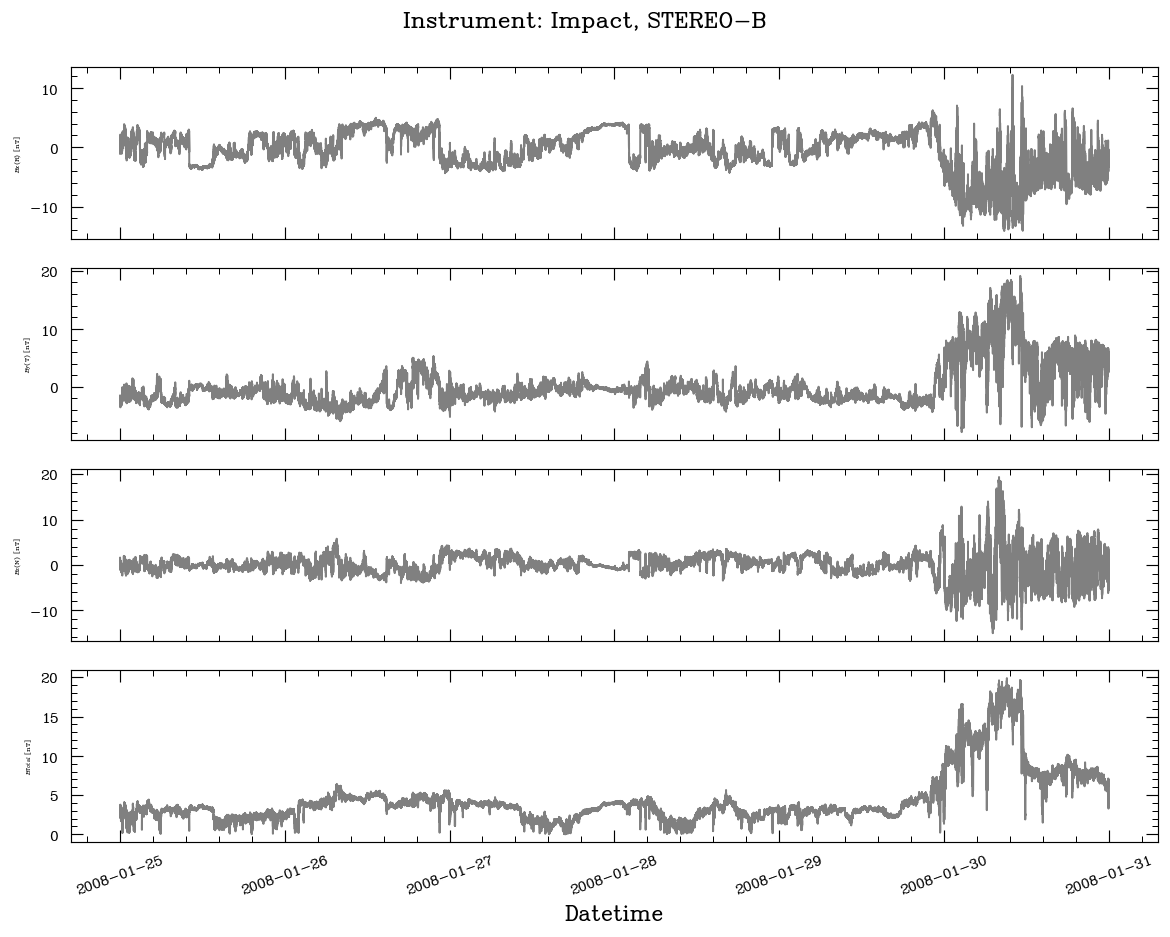

In [13]:
import matplotlib

matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)

fig, a = plt.subplots(4, 1, sharex=True, figsize=(10,8), tight_layout=True)
fig.suptitle('Instrument: Impact, STEREO-B', fontsize=16)
dataset_mag_test2.plot(ax=a, subplots=True, rot=20, legend=False, color='gray')
a[0].set_ylabel('$B_x$(R) [nT]', fontsize = 5)
a[1].set_ylabel('$B_y$(T) [nT]', fontsize = 5)
a[2].set_ylabel('$B_z$(N) [nT]', fontsize = 5)
a[3].set_ylabel('$B_{Total}$ [nT]', fontsize = 5)

#plt.savefig('STA_insitu_January_2008.png')
#plt.subplots_adjust(wspace=0, hspace=0)


plt.savefig(f"{images_dir}/insitu_January2B_magnetic.png", bbox_inches="tight")
plt.show()

In [ ]:
# Resample to 1 hour resolution

dataset_impact_resample = dataset_mag_test2.resample('60min').mean()

display(dataset_impact_resample)

,Bx(R),By(T),Bz(N),Total B
Datetime,,,,
2008-01-25 00:00:00,1.334245,-1.782183,-0.169359,2.756807
2008-01-25 01:00:00,0.742795,-1.402049,-0.428455,2.230753
2008-01-25 02:00:00,0.867522,-1.731102,-0.212713,2.900702
2008-01-25 03:00:00,-1.575463,-2.077912,1.099842,3.219269
2008-01-25 04:00:00,1.578799,-2.702944,-1.103310,3.415178
...,...,...,...,...
2008-01-30 19:00:00,-2.716246,4.915165,-1.923749,7.990416
2008-01-30 20:00:00,-4.785531,3.571809,-0.969489,7.493617
2008-01-30 21:00:00,-4.828548,4.146056,0.171970,7.749614


In [ ]:
stereo_in_situ_data = pd.concat([dataset_plastic_resample, dataset_impact_resample], axis=1)

08-Aug-24 00:34:44: /usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.1/424.1 kB 5.8 MB/s eta 0:00:00


08-Aug-24 00:34:48: /usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:86: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/smplotlib-0.0.9.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):

08-Aug-24 00:34:48: <frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()

08-Aug-24 00:34:48: <frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()

08-Aug-24 00:34:48: <frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()

08-Aug-24 00:34:48: <frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()

08-Aug-24 00:34:48: <frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_m

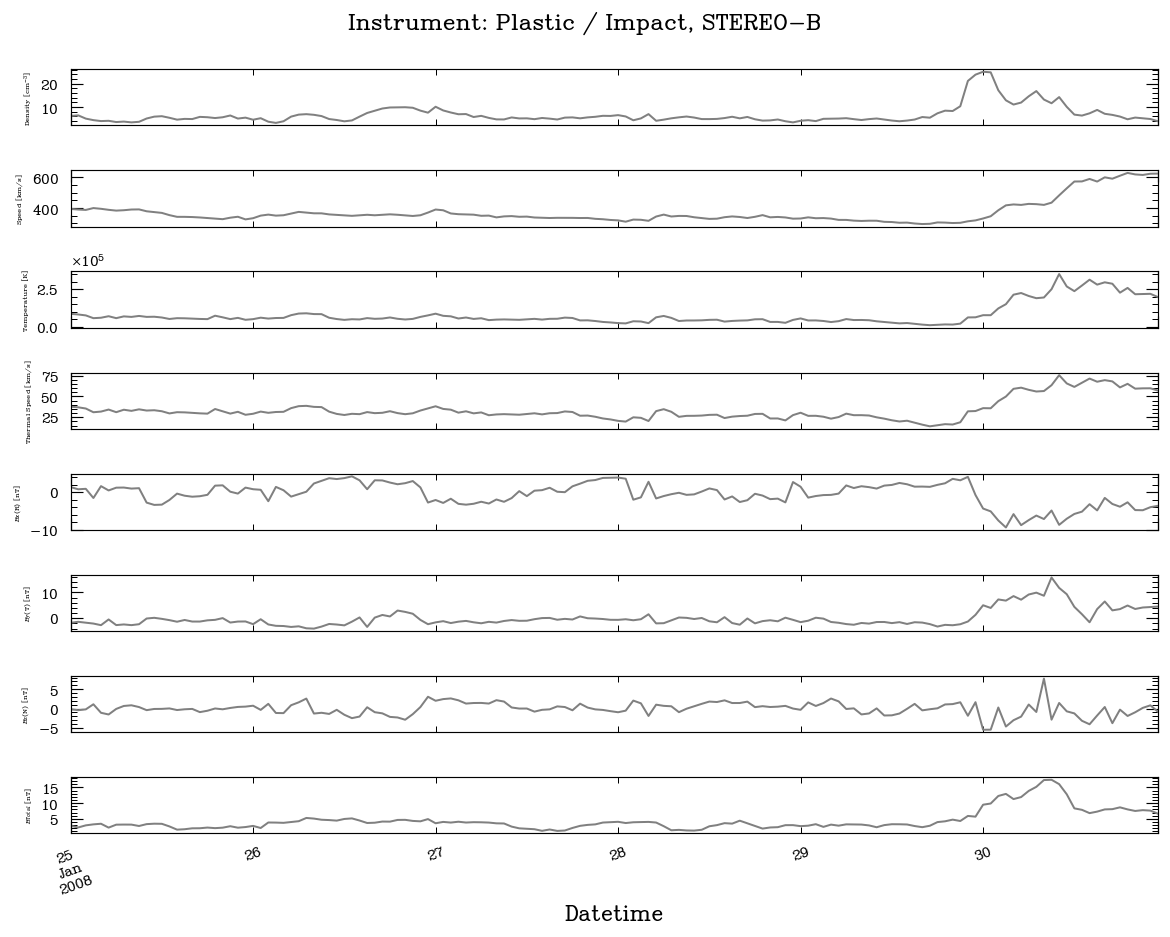

In [ ]:
import matplotlib.pyplot as plt
!pip install smplotlib
import smplotlib
import matplotlib

matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)

fig, a = plt.subplots(8, 1, sharex=True, figsize=(10,8), tight_layout=True)
fig.suptitle('Instrument: Plastic / Impact, STEREO-B', fontsize=16)
stereo_in_situ_data.plot(ax=a, subplots=True, rot=20, legend=False, color='gray')
a[0].set_ylabel('Density [cm$^{-3}$]', fontsize = 5)
a[1].set_ylabel('Speed [km$/$s]', fontsize = 5)
a[2].set_ylabel('Temperature [K]', fontsize = 5)
a[3].set_ylabel('Thermal Speed [km$/$s]', fontsize = 5)
a[4].set_ylabel('$B_x$(R) [nT]', fontsize = 5)
a[5].set_ylabel('$B_y$(T) [nT]', fontsize = 5)
a[6].set_ylabel('$B_z$(N) [nT]', fontsize = 5)
a[7].set_ylabel('$B_{Total}$ [nT]', fontsize = 5)

#a[0].axvline(x='2008-01-10 00:00:00', color = 'blue', linestyle = '--')
#a[1].axvline(x='2008-01-10 00:00:00', color = 'blue', linestyle = '--')
#a[2].axvline(x='2008-01-10 00:00:00', color = 'blue', linestyle = '--')
#a[3].axvline(x='2008-01-10 00:00:00', color = 'blue', linestyle = '--')
#a[4].axvline(x='2008-01-10 00:00:00', color = 'blue', linestyle = '--')
#a[5].axvline(x='2008-01-10 00:00:00', color = 'blue', linestyle = '--')
#a[6].axvline(x='2008-01-10 00:00:00', color = 'blue', linestyle = '--')
#a[7].axvline(x='2008-01-10 00:00:00', color = 'blue', linestyle = '--')

#a[0].axvline(x='2008-01-14 00:00:00', color = 'blue', linestyle = '--')
#a[1].axvline(x='2008-01-14 00:00:00', color = 'blue', linestyle = '--')
#a[2].axvline(x='2008-01-14 00:00:00', color = 'blue', linestyle = '--')
#a[3].axvline(x='2008-01-14 00:00:00', color = 'blue', linestyle = '--')
#a[4].axvline(x='2008-01-14 00:00:00', color = 'blue', linestyle = '--')
#a[5].axvline(x='2008-01-14 00:00:00', color = 'blue', linestyle = '--')
#a[6].axvline(x='2008-01-14 00:00:00', color = 'blue', linestyle = '--')
#a[7].axvline(x='2008-01-14 00:00:00', color = 'blue', linestyle = '--')

plt.savefig('STB_insitu_January_2008.png')

plt.show()